<a href="https://colab.research.google.com/github/coderlakshayjain/ds-ml-playground/blob/main/Support_vector_regression_using_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

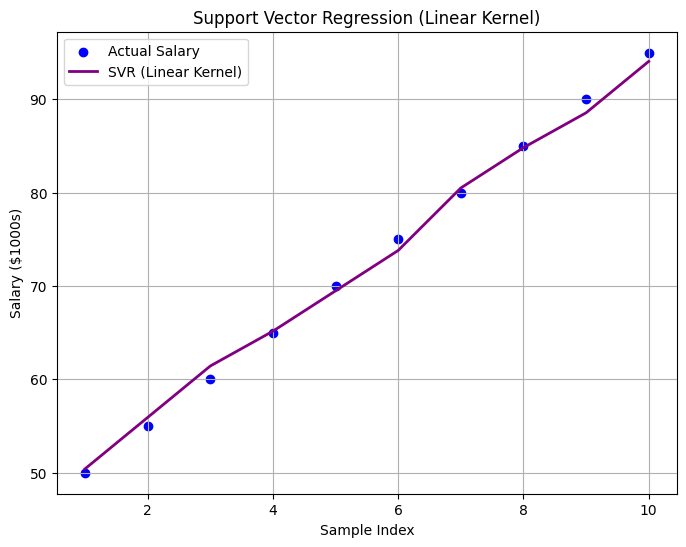

Support Vectors:
 [2 8]
SVR Coefficients (Linear Kernel): [[0.50959192 0.44846213]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# 1. Input data (horizontal format)
experience   = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
test_scores  = [60, 65, 70, 72, 75, 78, 85, 88, 90, 95]
salaries     = [50, 55, 60, 65, 70, 75, 80, 85, 90, 95]

# 2. Create feature matrix and target array
X = np.array([experience, test_scores]).T
y = np.array(salaries)

# 3. Scale features and target
X_scaler = StandardScaler()
y_scaler = StandardScaler()

X_scaled = X_scaler.fit_transform(X)
y_scaled = y_scaler.fit_transform(y.reshape(-1, 1)).flatten()  # flatten to 1D

# 4. Train SVR with linear kernel
svr_linear = SVR(kernel='linear', C=1.0, epsilon=0.1)
svr_linear.fit(X_scaled, y_scaled)

# 5. Predict and inverse scale
y_pred_scaled = svr_linear.predict(X_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# 6. Visualization
plt.figure(figsize=(8, 6))
plt.scatter(range(1, 11), y, color='blue', label='Actual Salary')
plt.plot(range(1, 11), y_pred, color='purple', label='SVR (Linear Kernel)', linewidth=2)
plt.title('Support Vector Regression (Linear Kernel)')
plt.xlabel('Sample Index')
plt.ylabel('Salary ($1000s)')
plt.legend()
plt.grid(True)
plt.show()

# 7. Print model info
print("Support Vectors:\n", svr_linear.support_)
print("SVR Coefficients (Linear Kernel):", svr_linear.coef_)
